In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from scipy.stats import kurtosis, normaltest, skew

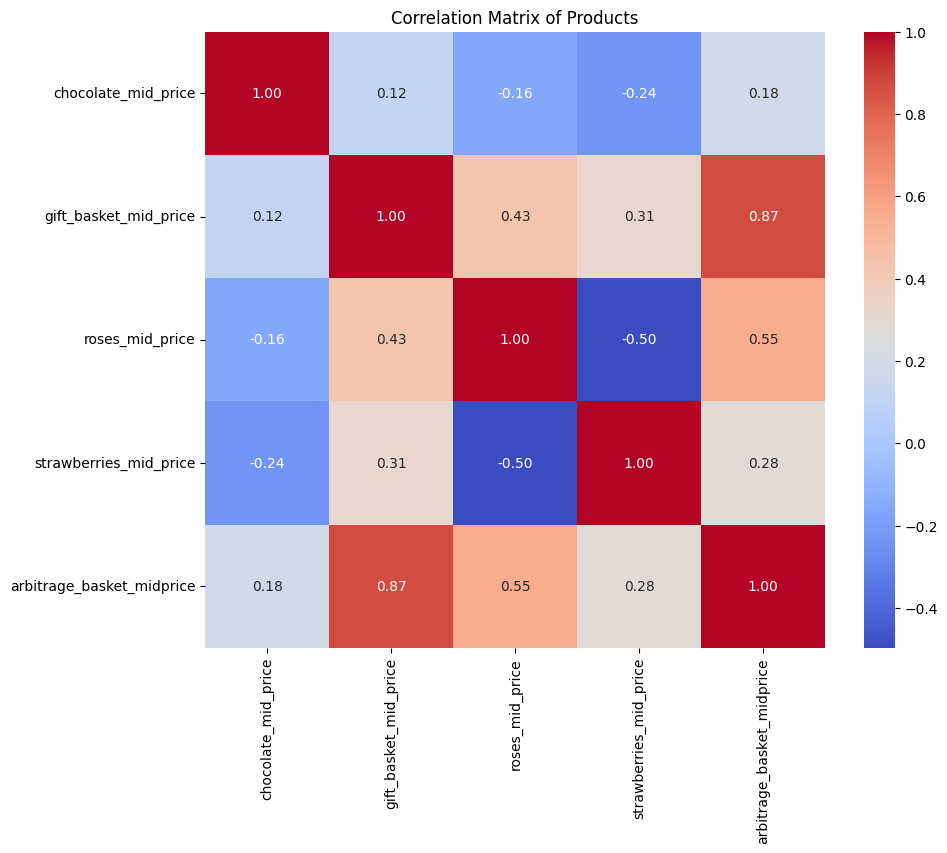

In [30]:
df = pd.read_csv(
    "data_bottles/round-3-island-data-bottle/prices_round_3_day_0.csv", sep=";"
)
df = df[["timestamp", "product", "mid_price"]]

normalized_df = df.pivot(
    index="timestamp", columns="product", values="mid_price"
).reset_index()
normalized_df.columns = [
    col if col == "timestamp" else col.lower() + "_mid_price"
    for col in normalized_df.columns
]
normalized_df["arbitrage_basket_midprice"] = (
    4 * normalized_df["chocolate_mid_price"]
    + 6 * normalized_df["strawberries_mid_price"]
    + 1 * normalized_df["roses_mid_price"]
)

normalized_df_corrs = normalized_df.drop(columns=["timestamp"])

correlation_matrix = normalized_df_corrs.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Products")
plt.show()

In [4]:

fig = make_subplots(rows=2, cols=1, subplot_titles=('Basket Mid Price vs Arbitrage Basket Mid Price', 'Difference Between Basket and Arbitrage Prices'))

fig.add_trace(
    go.Scatter(x=normalized_df['timestamp'], y=normalized_df['mid_price'], mode='lines', name='Basket Mid Price'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=normalized_df['timestamp'], y=normalized_df['arbitrage_basket_midprice'], mode='lines', name='Arbitrage Basket Mid Price'),
    row=1, col=1
)

difference = normalized_df['mid_price'] - normalized_df['arbitrage_basket_midprice']
fig.add_trace(
    go.Scatter(x=normalized_df['timestamp'], y=difference, mode='lines', name='Price Difference'),
    row=2, col=1
)

fig.update_xaxes(title_text="Timestamp", row=1, col=1)
fig.update_xaxes(title_text="Timestamp", row=2, col=1)

fig.update_yaxes(title_text="Mid Price", row=1, col=1)
fig.update_yaxes(title_text="Price Difference", row=2, col=1)

fig.update_layout(height=600, width=600, title_text="Basket and Arbitrage Price Analysis")
fig.show()


Mean Difference: 386.29905
1 Std Dev above Mean: 462.37
1 Std Dev below Mean: 310.23
2 Std Dev above Mean: 538.44
2 Std Dev below Mean: 234.15
-----------------------------------------------
Variance of Difference: 5787.038447942295
Skewness of Difference: 0.007015042531463097
Kurtosis of Difference: -0.4818311177032877
Normality Test Statistic: 172.4684160839038, P-value: 3.5396416450929723e-38


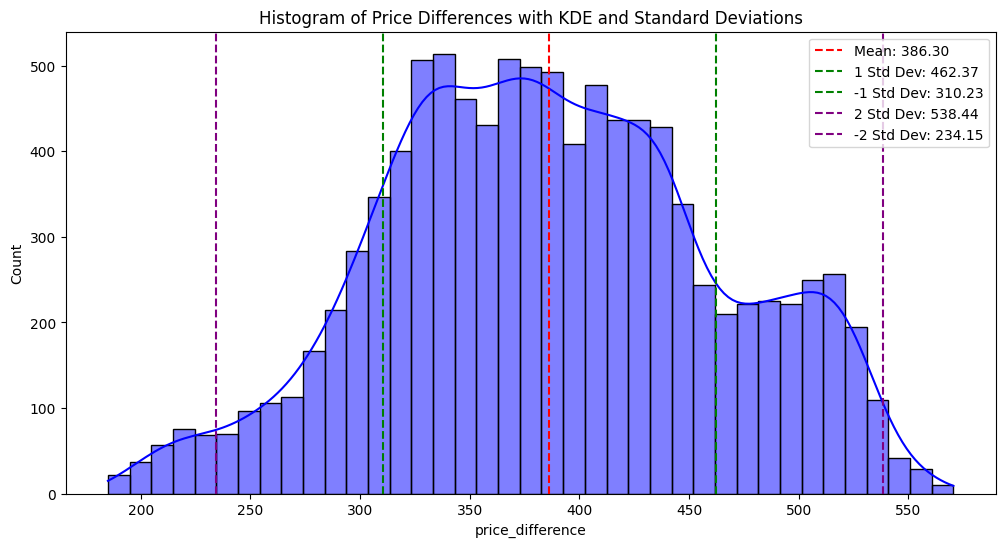

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, normaltest, skew

normalized_df["price_difference"] = (
    normalized_df["mid_price"] - normalized_df["arbitrage_basket_midprice"]
)

mean_difference = normalized_df["price_difference"].mean()
std_deviation = normalized_df["price_difference"].std()  # Standard deviation
variance_difference = normalized_df["price_difference"].var()
skewness = skew(normalized_df["price_difference"])
kurt = kurtosis(normalized_df["price_difference"])
stat, p_value = normaltest(normalized_df["price_difference"])


print(f"Mean Difference: {mean_difference}")
print(f"1 Std Dev above Mean: {mean_difference + std_deviation:.2f}")
print(f"1 Std Dev below Mean: {mean_difference - std_deviation:.2f}")
print(f"2 Std Dev above Mean: {mean_difference + 2 * std_deviation:.2f}")
print(f"2 Std Dev below Mean: {mean_difference - 2 * std_deviation:.2f}")
print("-----------------------------------------------")
print(f"Variance of Difference: {variance_difference}")
print(f"Skewness of Difference: {skewness}")
print(f"Kurtosis of Difference: {kurt}")
print(f"Normality Test Statistic: {stat}, P-value: {p_value}")


plt.figure(figsize=(12, 6))
sns.histplot(normalized_df["price_difference"], kde=True, color="blue")
plt.axvline(
    mean_difference, color="red", linestyle="--", label=f"Mean: {mean_difference:.2f}"
)
plt.axvline(
    mean_difference + std_deviation,
    color="green",
    linestyle="--",
    label=f"1 Std Dev: {mean_difference + std_deviation:.2f}",
)
plt.axvline(
    mean_difference - std_deviation,
    color="green",
    linestyle="--",
    label=f"-1 Std Dev: {mean_difference - std_deviation:.2f}",
)
plt.axvline(
    mean_difference + 2 * std_deviation,
    color="purple",
    linestyle="--",
    label=f"2 Std Dev: {mean_difference + 2*std_deviation:.2f}",
)
plt.axvline(
    mean_difference - 2 * std_deviation,
    color="purple",
    linestyle="--",
    label=f"-2 Std Dev: {mean_difference - 2*std_deviation:.2f}",
)
plt.title("Histogram of Price Differences with KDE and Standard Deviations")
plt.legend()
plt.show()

## DAY 0
- Mean Difference: 370.2306
- 1 Std Dev above Mean: 455.52
- 1 Std Dev below Mean: 284.94
- 2 Std Dev above Mean: 540.82
- 2 Std Dev below Mean: 199.64
- Variance of Difference: 7274.926266266628
- Skewness of Difference: -0.3010746617661539
- Kurtosis of Difference: -0.5759575245024497
- Normality Test Statistic: 430.5513807780203, P-value: 3.2133318310226095e-94
## DAY 1
- Mean Difference: 381.9418
- 1 Std Dev above Mean: 447.69
- 1 Std Dev below Mean: 316.19
- 2 Std Dev above Mean: 513.44
- 2 Std Dev below Mean: 250.44
- Variance of Difference: 4323.137326492649
- Skewness of Difference: 0.4011965823179975
- Kurtosis of Difference: 0.557930669348655
- Normality Test Statistic: 331.059708894021, P-value: 1.2921044536369958e-72
## DAY 2
- Mean Difference: 386.29905
- 1 Std Dev above Mean: 462.37
- 1 Std Dev below Mean: 310.23
- 2 Std Dev above Mean: 538.44
- 2 Std Dev below Mean: 234.15
- Variance of Difference: 5787.038447942295
- Skewness of Difference: 0.007015042531463097
- Kurtosis of Difference: -0.4818311177032877
- Normality Test Statistic: 172.4684160839038, P-value: 3.5396416450929723e-38


In [123]:
# Day 0 values
mean_difference_day_0 = 370.2306
std1_above_day_0 = 455.52
std1_below_day_0 = 284.94
std2_above_day_0 = 540.82
std2_below_day_0 = 199.64

# Day 1 values
mean_difference_day_1 = 381.9418
std1_above_day_1 = 447.69
std1_below_day_1 = 316.19
std2_above_day_1 = 513.44
std2_below_day_1 = 250.44

# Day 2 values
mean_difference_day_2 = 386.29905
std1_above_day_2 = 462.37
std1_below_day_2 = 310.23
std2_above_day_2 = 538.44
std2_below_day_2 = 234.15

# Calculating global averages
global_gift_basket_premium = (
    mean_difference_day_0 + mean_difference_day_1 + mean_difference_day_2
) / 3
global_std1_above = (std1_above_day_0 + std1_above_day_1 + std1_above_day_2) / 3
global_std1_below = (std1_below_day_0 + std1_below_day_1 + std1_below_day_2) / 3
global_std2_above = (std2_above_day_0 + std2_above_day_1 + std2_above_day_2) / 3
global_std2_below = (std2_below_day_0 + std2_below_day_1 + std2_below_day_2) / 3

# Printing global averages
print("GLOBAL_GIFT_BASKET_PREMIUM:", global_gift_basket_premium)
print("GLOBAL 1 STD DEV ABOVE MEAN:", global_std1_above)
print("GLOBAL 1 STD DEV BELOW MEAN:", global_std1_below)
print("GLOBAL 2 STD DEV ABOVE MEAN:", global_std2_above)
print("GLOBAL 2 STD DEV BELOW MEAN:", global_std2_below)

GLOBAL_GIFT_BASKET_PREMIUM: 379.4904833333333
GLOBAL 1 STD DEV ABOVE MEAN: 455.1933333333333
GLOBAL 1 STD DEV BELOW MEAN: 303.7866666666667
GLOBAL 2 STD DEV ABOVE MEAN: 530.9000000000001
GLOBAL 2 STD DEV BELOW MEAN: 228.07666666666668
